In [1]:
from fastai import *
from fastai.vision import *
import numpy as np


In [35]:
folder = "BMW"
file ="BMW/BMW.csv"

In [40]:
folder = "AUDI"
file ="AUDI/Audi.csv"

In [45]:

folder = "Mercedes Benz"
file ="Mercedes Benz/mercedes benz.csv" #mercedes benz.csv

In [29]:

folder = "Toyota"
file ="Toyota/Toyota.csv"

In [46]:
path = Path("/Users/sandisemditshwa/Desktop/Data/")

dest = path/folder
dest.mkdir(parents=True,exist_ok=True)

In [42]:
path.ls()

[PosixPath('/Users/sandisemditshwa/Desktop/Data/Mercedes Benz'),
 PosixPath('/Users/sandisemditshwa/Desktop/Data/.DS_Store'),
 PosixPath('/Users/sandisemditshwa/Desktop/Data/Toyota'),
 PosixPath('/Users/sandisemditshwa/Desktop/Data/AUDI'),
 PosixPath('/Users/sandisemditshwa/Desktop/Data/BMW')]

In [47]:
classes = ["BMW","AUDI","Mercedes Benz","Toyota"] # These are the images I will train the model on

In [48]:
download_images(path/file, dest,max_pics=800)  # download the images


In [49]:
#remove images I can't open
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=600) 

BMW


/Users/sandisemditshwa/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +
/Users/sandisemditshwa/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +
/Users/sandisemditshwa/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +
/Users/sandisemditshwa/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +
/Users/sandisemditshwa/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarni

cannot identify image file <_io.BufferedReader name='/Users/sandisemditshwa/Desktop/Data/BMW/00000040.jpg'>
cannot identify image file <_io.BufferedReader name='/Users/sandisemditshwa/Desktop/Data/BMW/00000083.jpg'>
AUDI


/Users/sandisemditshwa/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


cannot identify image file <_io.BufferedReader name='/Users/sandisemditshwa/Desktop/Data/AUDI/00000075.jpg'>


/Users/sandisemditshwa/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +
/Users/sandisemditshwa/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


cannot identify image file <_io.BufferedReader name='/Users/sandisemditshwa/Desktop/Data/AUDI/00000087.jpg'>
cannot identify image file <_io.BufferedReader name='/Users/sandisemditshwa/Desktop/Data/AUDI/00000054.jpg'>
Mercedes Benz


/Users/sandisemditshwa/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


cannot identify image file <_io.BufferedReader name='/Users/sandisemditshwa/Desktop/Data/Mercedes Benz/00000072.jpg'>


/Users/sandisemditshwa/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +
/Users/sandisemditshwa/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +
/Users/sandisemditshwa/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +
/Users/sandisemditshwa/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


Toyota


/Users/sandisemditshwa/anaconda3/lib/python3.7/site-packages/PIL/Image.py:1021: UserWarning: Couldn't allocate palette entry for transparency
  warnings.warn("Couldn't allocate palette entry " +


cannot identify image file <_io.BufferedReader name='/Users/sandisemditshwa/Desktop/Data/Toyota/00000077.png'>


/Users/sandisemditshwa/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +
/Users/sandisemditshwa/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +
/Users/sandisemditshwa/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +
/Users/sandisemditshwa/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


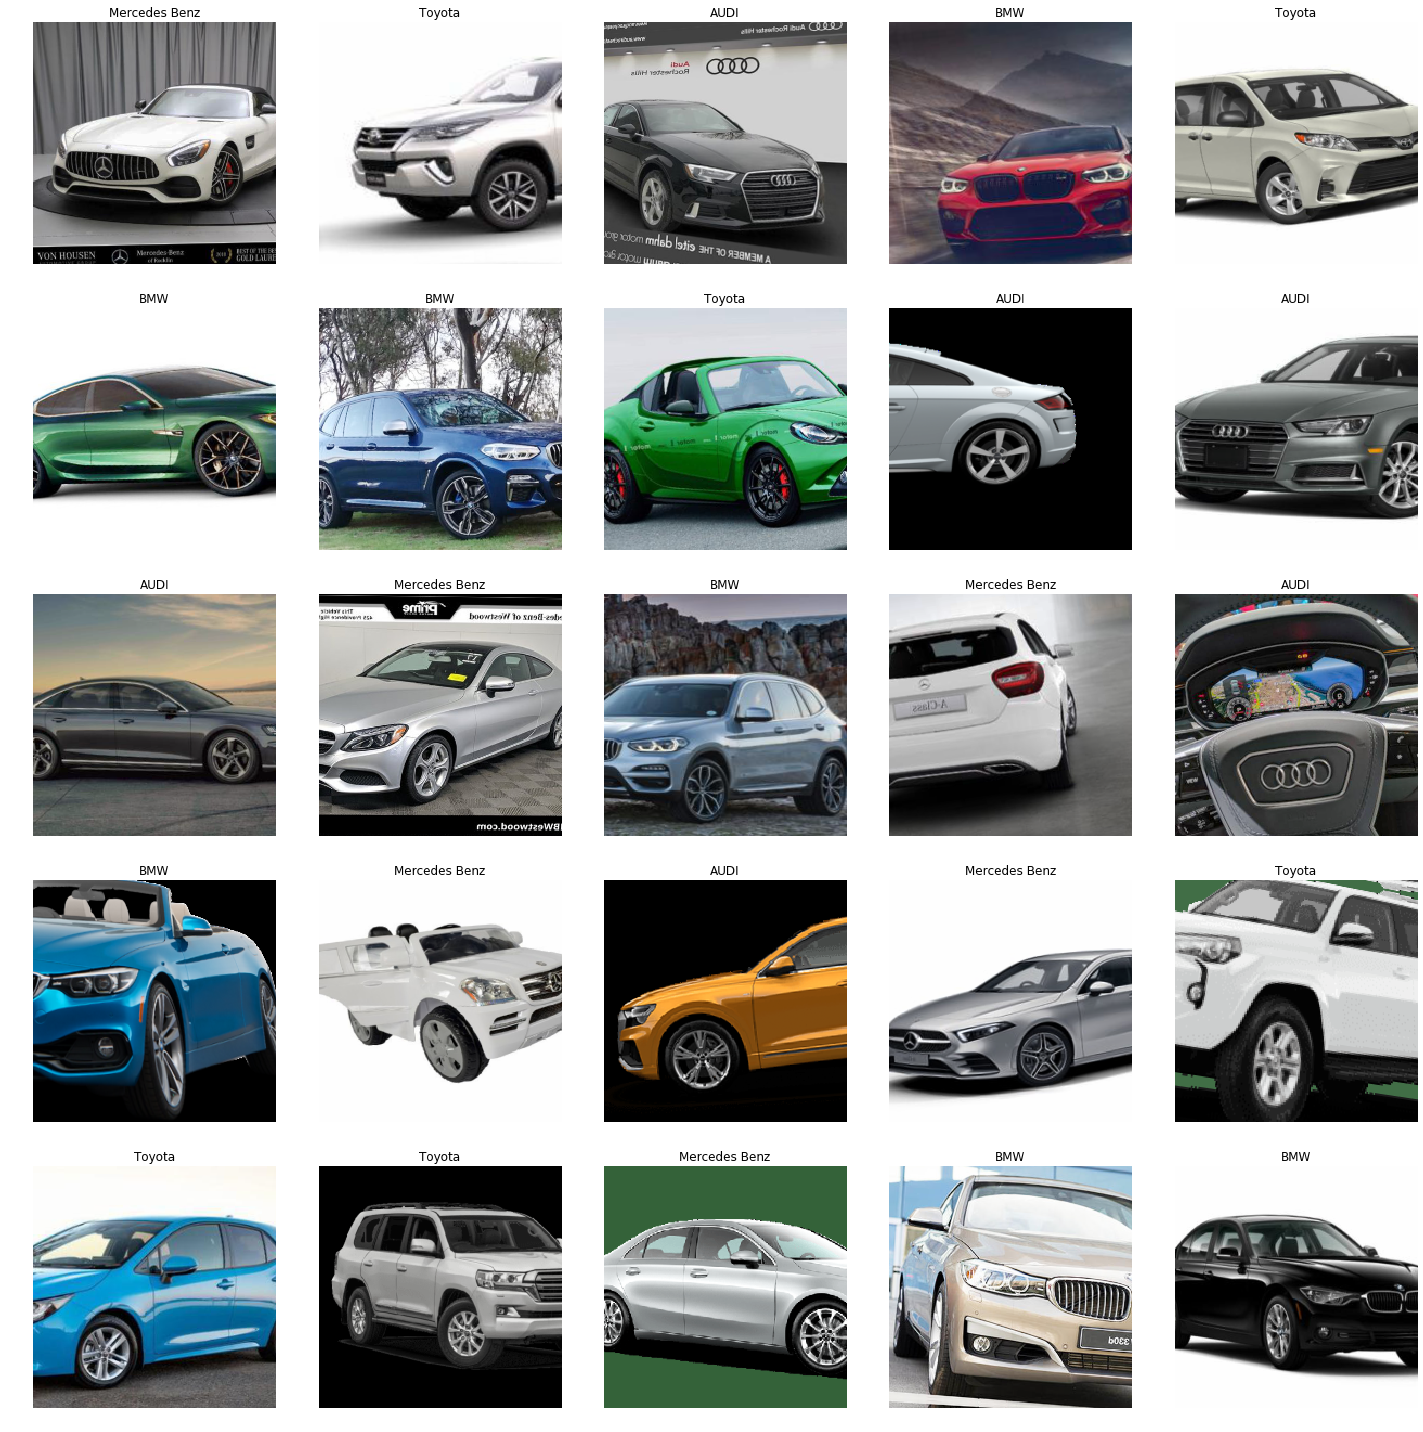

In [50]:
#view data in each category

np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

data.show_batch()  # show a few images


In [51]:
data.classes # show me the labels

['AUDI', 'BMW', 'Mercedes Benz', 'Toyota']

In [52]:
len(data.train_ds), len(data.valid_ds)   # number of training images, number of validation images\\


(309, 77)

In [53]:
# Train the model

model = cnn_learner(data,models.resnet34,metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /Users/sandisemditshwa/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [02:22<00:00, 610546.50it/s] 


In [54]:
#Training begins
model.fit_one_cycle(10)

In [55]:
model.save("stage-1")

In [56]:
model.unfreeze()  # Use the whole network

In [57]:
model.lr_find() # find a good learning rate

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


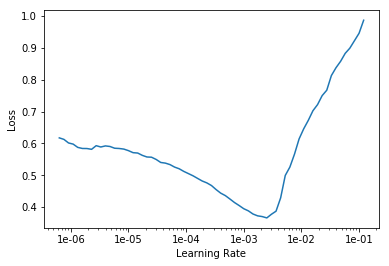

In [58]:
model.recorder.plot() 

# where the slope of the curve is taking a fall.

In [59]:
model.fit_one_cycle(15,max_lr=slice(1e-04,1e-03))

In [60]:
model.save('stage-2')

In [61]:
# Have a look whats goin on 

interp = ClassificationInterpretation.from_learner(model)

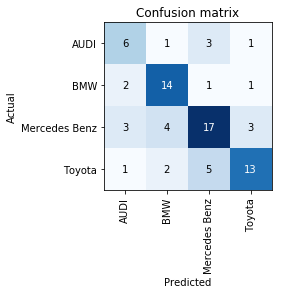

In [62]:
interp.plot_confusion_matrix()

In [63]:
interp.most_confused(min_val=2)

[('Toyota', 'Mercedes Benz', 5),
 ('Mercedes Benz', 'BMW', 4),
 ('AUDI', 'Mercedes Benz', 3),
 ('Mercedes Benz', 'AUDI', 3),
 ('Mercedes Benz', 'Toyota', 3),
 ('BMW', 'AUDI', 2),
 ('Toyota', 'BMW', 2)]

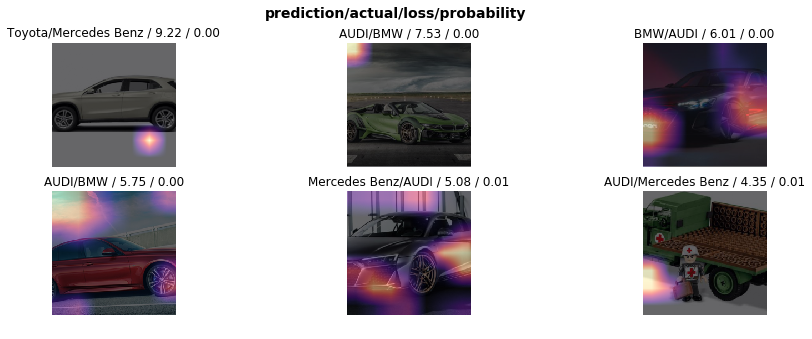

In [64]:
interp.plot_top_losses(6,figsize=(15,5)) #shows us our loss.

In [65]:
# There are some false images in the dataset
# remove them

In [66]:
from fastai.widgets import *

data_clean = (ImageList.from_folder(path)
                   .no_split()
                   .label_from_folder()
                   .transform(get_transforms(), size=224)
                   .databunch()
     )

/Users/sandisemditshwa/anaconda3/lib/python3.7/site-packages/fastai/data_block.py:171: UserWarning: `no_split` is deprecated, please use `split_none`.
  warn("`no_split` is deprecated, please use `split_none`.")


In [67]:
model_clean = cnn_learner(data_clean, models.resnet34, metrics=accuracy)
model_clean.load('stage-2');

In [68]:
ds, idxs = DatasetFormatter().from_toplosses(model_clean)

In [69]:
ImageCleaner(ds, idxs, path)


Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

In [70]:
# remove duplicates
ds, idxs = DatasetFormatter().from_similars(model_clean)
ImageCleaner(ds, idxs, path, duplicates=True)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

In [71]:
model_clean.lr_find() # best learning rate

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


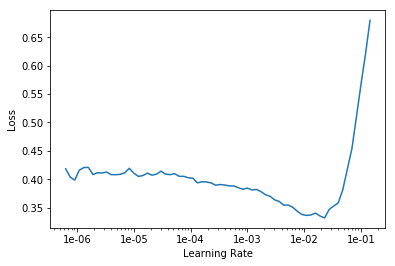

In [72]:
model_clean.recorder.plot() 


In [73]:
model_clean.fit_one_cycle(15, max_lr=slice(1e-03,1e-02))

In [74]:
data_clean.classes

['AUDI', 'BMW', 'Mercedes Benz', 'Toyota']

In [82]:
model_clean.export()
defaults.device = torch.device('cpu')

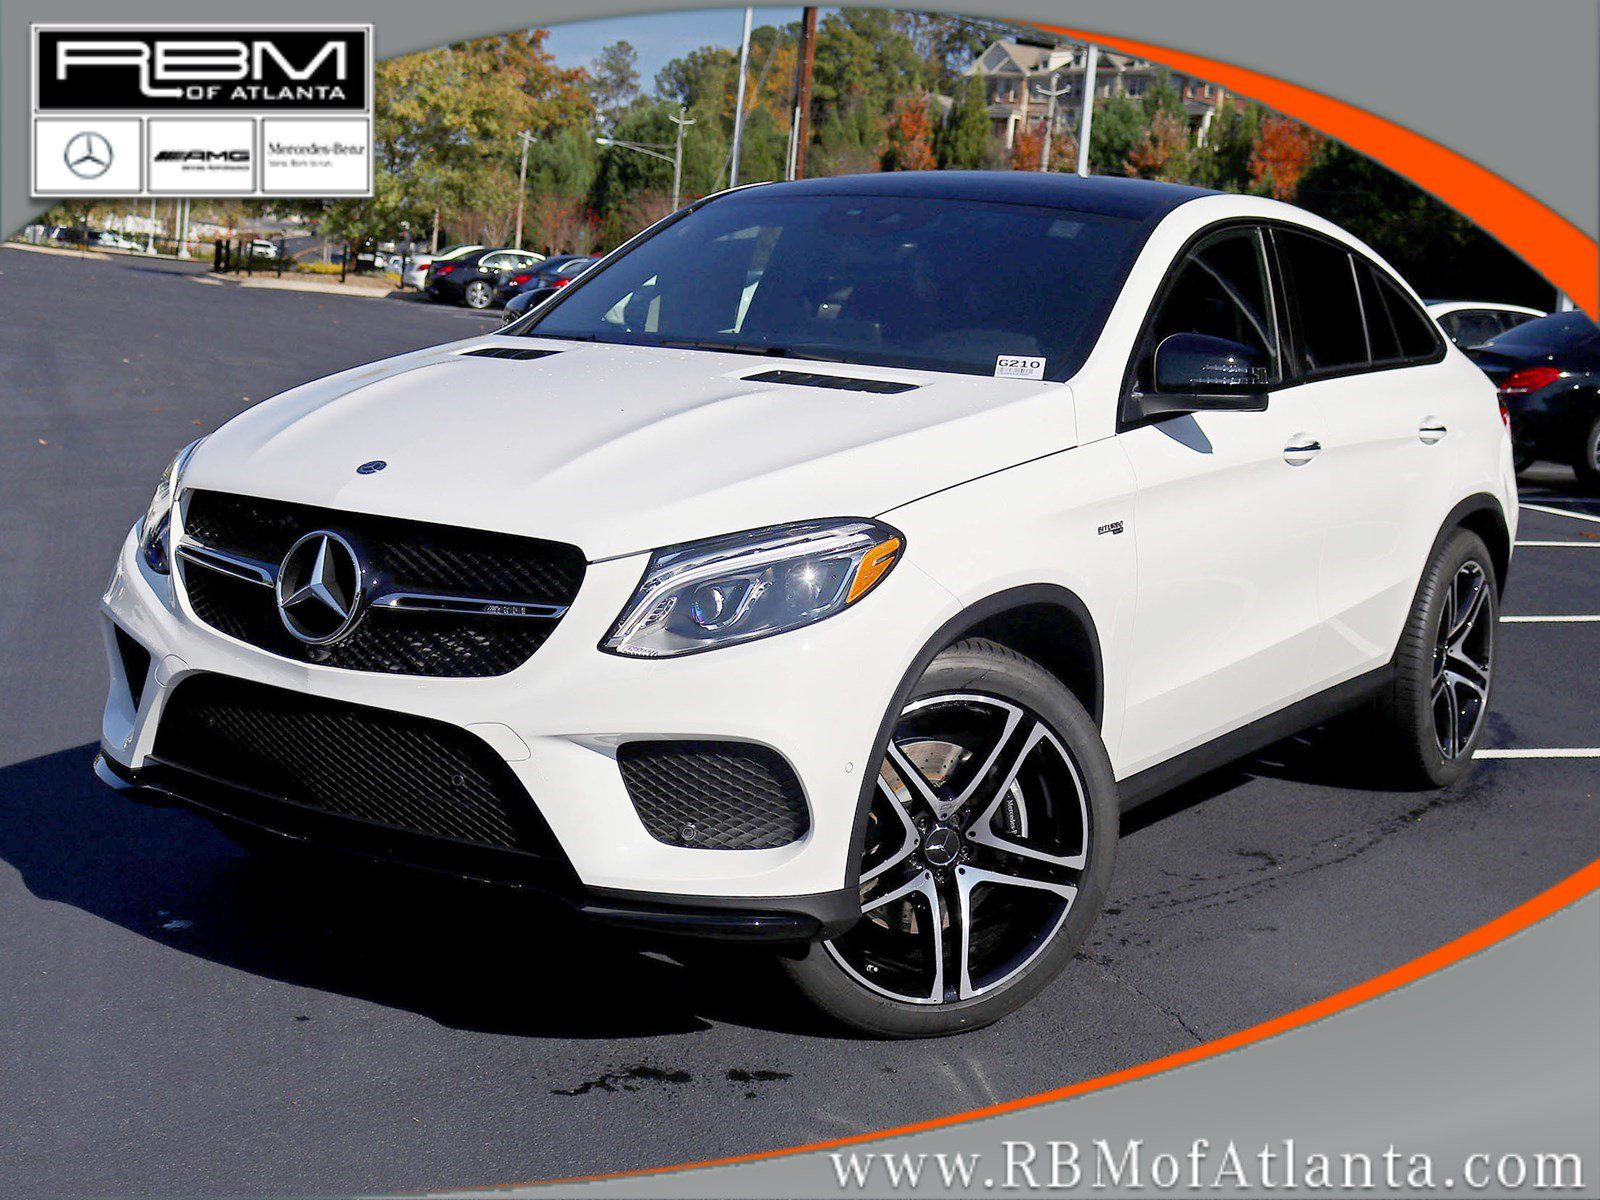

In [83]:
#Test the model

img = open_image("/Users/sandisemditshwa/Downloads/benz.jpg")
img

In [80]:
model_clean = load_learner(path)

In [81]:
pred_class,pred_idx,outputs = model_clean.predict(img)
pred_class

Category Mercedes Benz